Tutorial
-----------

To follow this tutorial, the data test files of MAICoS are needed.
From a terminal, download MAICoS at a location of your choice:

First, import MDAnalysis, MAICoS, PyPlot, 
and NumPy (and hide warning):

In [ ]:
import maicos
import warnings
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Define the path to the ``airwater`` data folder of MAICoS:

In [ ]:
datapath = "../../../../tests/data/airwater/"

The system consists of a 2D slab with 352 water molecules in vacuum,
where the two water/vacuum interfaces are normal to 
the axis $z$ :

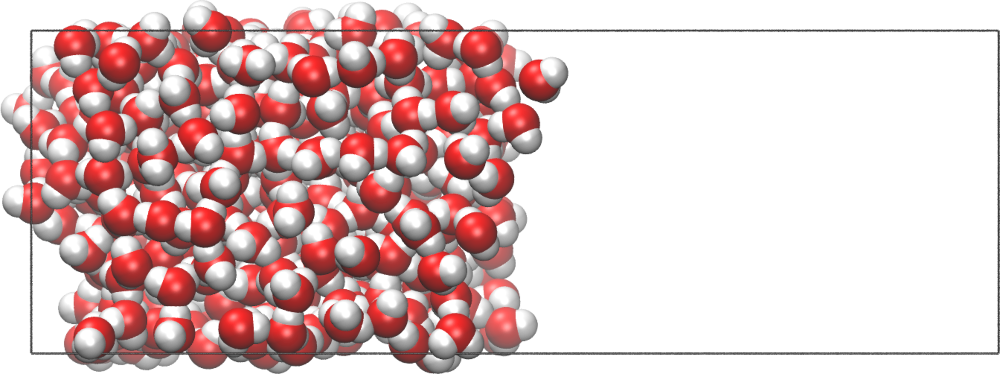

Create a universe using MDAnalysis and define a group containing
the oxygen and the hydrogen atoms of the water molecules:

In [ ]:
u = mda.Universe(datapath+'conf.gro', datapath+'traj.trr')
grp_H2O = u.select_atoms('type O or type H')

Let us call the ``DensityPlanar`` class:

In [ ]:
dplan = maicos.density_planar(grp_H2O)
dplan.run()

Extract the coordinate and the density profile:

In [ ]:
zcoor = dplan.results['z']
dens = dplan.results['dens_mean']

By default the binwidth is 0.1 nanometers, the units are kg/m$^3$,
and the axis is $z$. Plot it using :

In [ ]:
fig = plt.figure(figsize = (12,6))
plt.plot(zcoor,dens,linewidth=2)
plt.xlabel("z coordinate [nanometer]")
plt.ylabel("density H2O [kg/m3]")
plt.show()

They are several options you can play with. To know the full
list of options, have a look at the ``Inputs`` section below.
For instance, you can increase the spacial resolution
by reducing the binwidth:

In [ ]:
dplan = maicos.density_planar(grp_H2O, binwidth = 0.05)